In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('insurance.csv')



### **One-Hot Encoding of Categorical Features**

The following code performs one-hot encoding on the categorical features in the DataFrame `df`:

1. **Define Categorical Features**:
   - We have three categorical features: `'sex'`, `'smoker'`, and `'region'`.

2. **Apply One-Hot Encoding**:
   - The `OneHotEncoder` from scikit-learn is used to convert the categorical variables into numerical format. The `drop='first'` parameter is set to avoid the dummy variable trap (i.e., removing the first category of each feature to prevent collinearity). The `sparse_output=False` option ensures that the result is returned as a dense array instead of a sparse matrix.

3. **Transform the Categorical Data**:
   - The `fit_transform` method applies the one-hot encoding to the specified categorical columns (`sex`, `smoker`, `region`).

4. **Create a DataFrame with Encoded Columns**:
   - A new DataFrame `encoded_df` is created with the one-hot encoded values. The columns are named based on the original categorical feature names, prefixed by the feature values (e.g., `sex_male`, `smoker_yes`).

5. **Concatenate the Original Data with Encoded Columns**:
   - Finally, the original DataFrame `df` is combined with the encoded columns by dropping the original categorical features and appending the new encoded columns. The result is stored in `enhanced_df`.

This results in a DataFrame where the categorical features are replaced by their one-hoar explanation of the code.

In [4]:
categorical_features = ['sex', 'smoker', 'region']
encode = OneHotEncoder(drop='first', sparse_output=False)
df_encoded_columns = encode.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(df_encoded_columns, columns=encode.get_feature_names_out(categorical_features))
enhanced_df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
# This will replace any inf or -inf values in your DataFrame with NaN, allowing you to proceed with visualizations and model training without encountering the warning.
enhanced_df.replace([np.inf, -np.inf], np.nan, inplace=True)
enhanced_df.head(4)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0


The distribution of `charges` in the plot you've shared appears to be right-skewed, which is quite common in datasets with financial figures like insurance charges. The long tail to the right suggests that most of the data points are clustered around lower values, with a few outliers or higher values stretching out towards the right.

### Next Steps:
1. **Log Transformation**: A common approach for skewed data like this is to apply a log transformation to the `charges` column. This can make the distribution more normal and stabilize the variance, which helps improve model performance, especially with linear models or polynomial regressi plt.show()
   ```

2. **Why Transformation Helps**:
   - **Stabilizes Variance**: A right-skewed distribution with high variance can make the model sensitive to extreme values. Applying a log transformation reduces the influence of outliers and makes the variance more uniform.
   - **Improves Model Fit**: Many machine learning models, including polynomial regression, perform better when the data distribution is more normal.

Let me know if you'd like more help with this transformation or further steps!

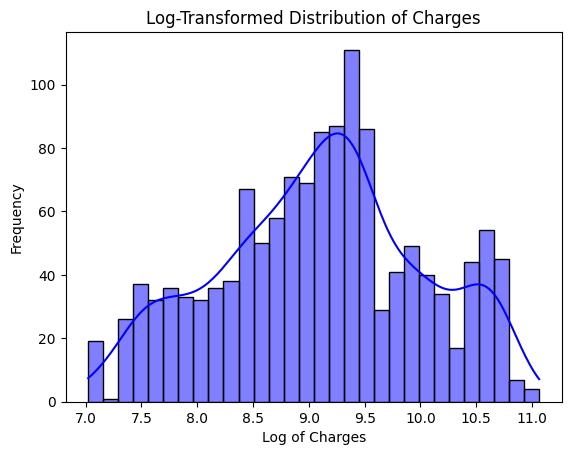

In [5]:
import numpy as np
New_target = np.log1p(enhanced_df['charges'])
sns.histplot(x=New_target , kde = 'True' ,color='blue', bins=30)
plt.title('Log-Transformed Distribution of Charges')
plt.xlabel('Log of Charges')
plt.ylabel('Frequency')
plt.show()  # much better



### **Splitting the Dataset for Model Training, Cross Validation, and Testing**

When building machine learning models, it's essential to split the dataset into different subsets to ensure proper evaluation and avoid overfitting. Here's a breakdown of the different subsets and their roles:

- **Training Set**: This is used to train the model, allowing it to learn the patterns in the data.
- **Cross Validation Set (also called Validation, Development, or Dev Set)**: This set is used to evaluate and fine-tune the model by testing different configurations. For WEmple, you might use this set to decide on the degree of polynomial features to inoure in your dataset.
- **Test Set**: After choosing the final model, the test set provides a fair estimate of the model’s performance on new, unseen data. It should not be used during model development.

To achieve this, we can use Scikit-learn's [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, which allows us to split the dataset into training, validation (cross-validation), and test sets.

Below is the code to split the entire dataset into 60% for training, 20% for cross-validation, and 20%her modifications!

In [6]:
# Preparing the input (X) and target (y) variables
X = enhanced_df.drop('charges', axis=1)  # Drop 'charges' column from the dataset to get features
y = New_target  # Assign the target variable

# Converting to numpy arrays
X = np.array(X)
y = np.array(y)

# Splitting the data into Training Set, Cross-Validation Set, and Test Set
X_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% for further split
X_cv, X_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=42)  # Split the remaining 40% into 50% for CV and 50% for test

# Deleting temporary variables
del x_, y_

# Displaying the shapes of the datasets and some sample values
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_cv: ", X_cv.shape)
print("Shape of y_cv: ", y_cv.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Displaying the first 5 samples from each set
print("\nFirst 5 samples of X_train:")
print(X_train[:5])
print("First 5 values of y_train:")
print(y_train[:5])

print("\nFirst 5 samples of X_cv:")
print(X_cv[:5])
print("First 5 values of y_cv:")
print(y_cv[:5])

print("\nFirst 5 samples of X_test:")
print(X_test[:5])
print("First 5 values of y_test:")
print(y_test[:5])

Shape of X:  (1338, 8)
Shape of y:  (1338,)
Shape of X_train:  (802, 8)
Shape of y_train:  (802,)
Shape of X_cv:  (268, 8)
Shape of y_cv:  (268,)
Shape of X_test:  (268, 8)
Shape of y_test:  (268,)

First 5 samples of X_train:
[[59.   27.72  3.    0.    0.    0.    1.    0.  ]
 [60.   25.74  0.    1.    0.    0.    1.    0.  ]
 [28.   34.77  0.    0.    0.    1.    0.    0.  ]
 [19.   28.4   1.    0.    0.    0.    0.    1.  ]
 [45.   27.5   3.    1.    0.    0.    0.    1.  ]]
First 5 values of y_train:
[9.54696501 9.4045558  8.17693203 7.75470408 9.06141104]

First 5 samples of X_cv:
[[18.   31.92  0.    0.    0.    0.    0.    0.  ]
 [27.   29.15  0.    1.    1.    0.    1.    0.  ]
 [26.   23.7   2.    1.    0.    0.    0.    1.  ]
 [53.   36.86  3.    0.    1.    1.    0.    0.  ]
 [54.   47.41  0.    0.    1.    0.    1.    0.  ]]
First 5 values of y_cv:
[ 7.69938071  9.81178312  8.1563183  10.75069489 11.06306053]

First 5 samples of X_test:
[[43.    26.7    2.     0.     1.    

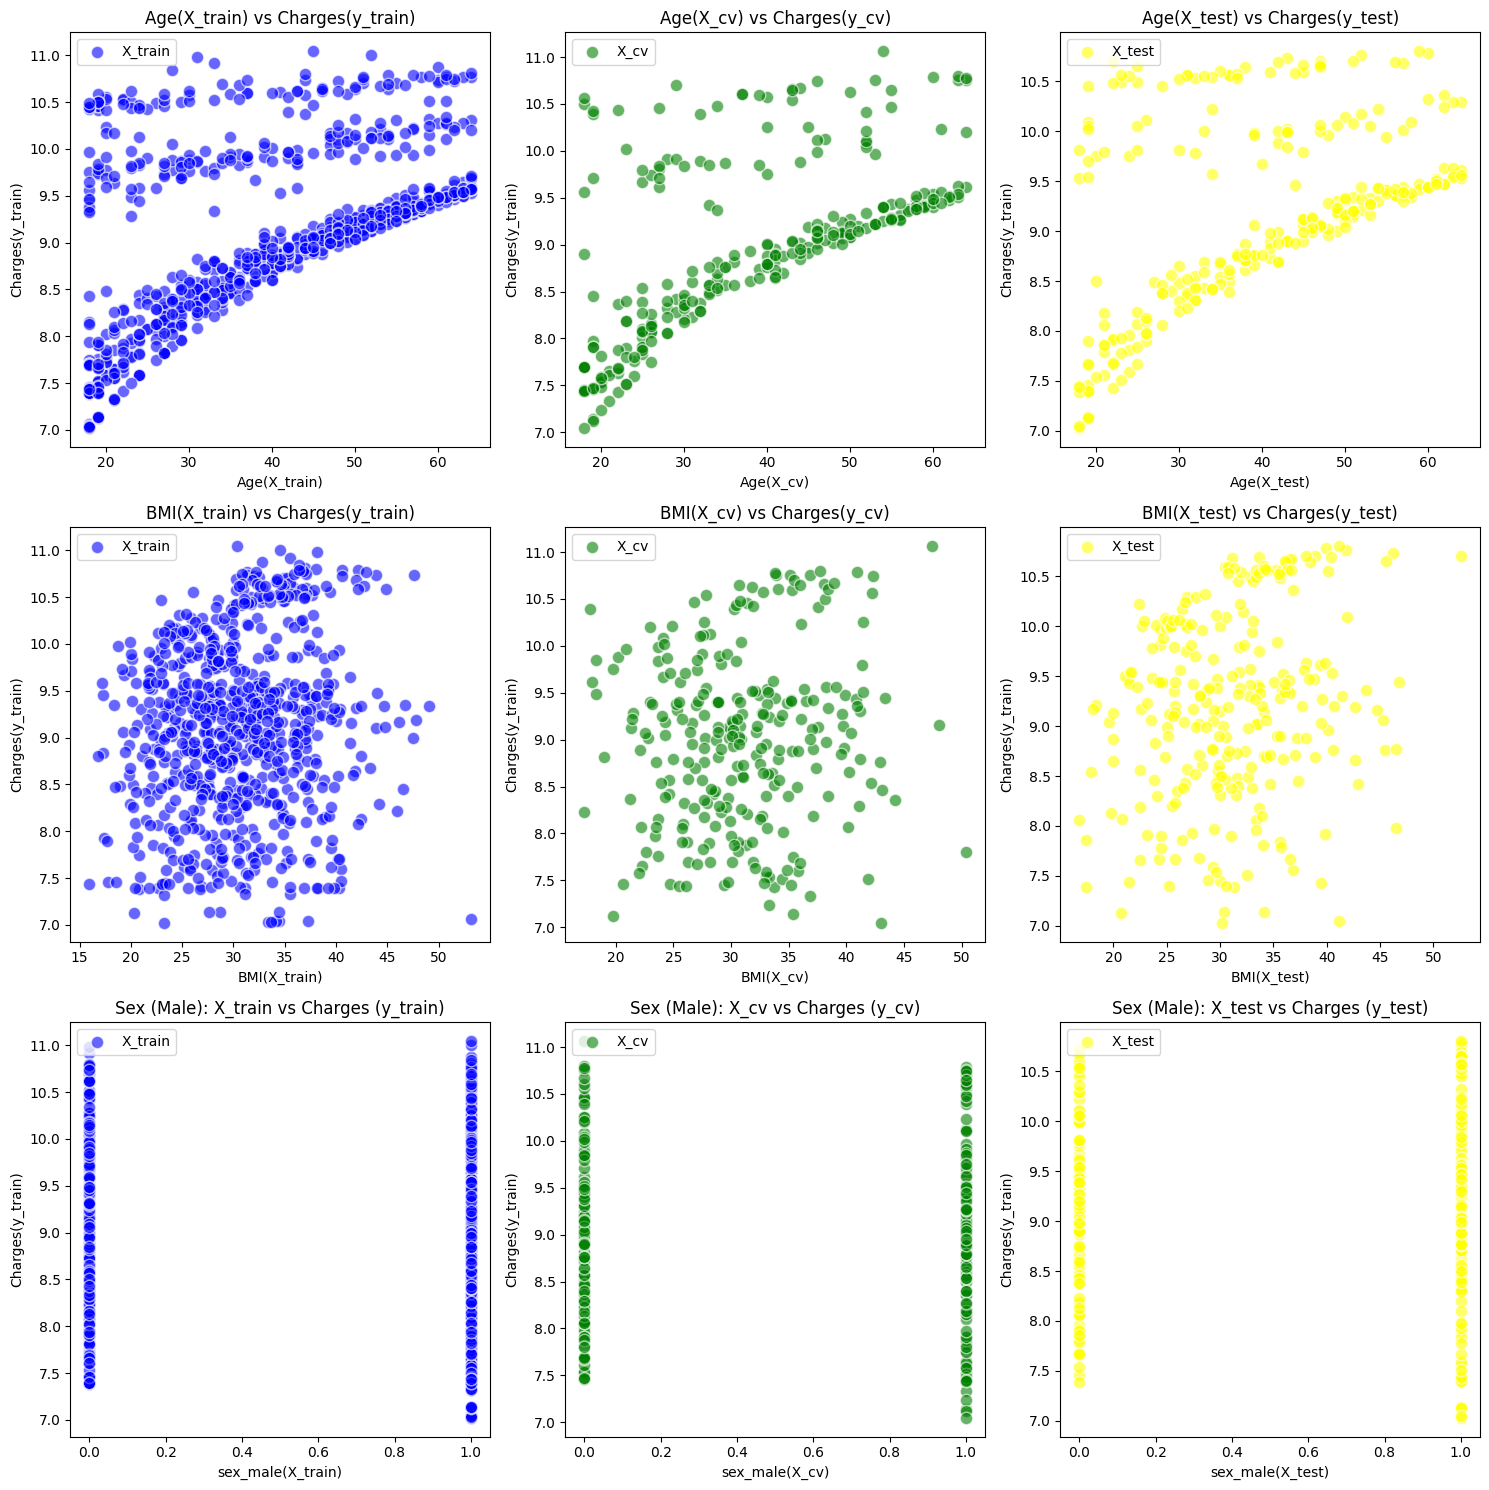

In [ ]:
import matplotlib.pyplot as plt

# Creating subplots with a better layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flattening for easier indexing

# List of features and their corresponding titles and labels
features = ['Age', 'BMI', 'Sex (Male)']
data = [
    (X_train[:, 0], y_train, 'blue', 'X_train'),
    (X_cv[:, 0], y_cv, 'green', 'X_cv'),
    (X_test[:, 0], y_test, 'yellow', 'X_test'),
    (X_train[:, 1], y_train, 'blue', 'X_train'),
    (X_cv[:, 1], y_cv, 'green', 'X_cv'),
    (X_test[:, 1], y_test, 'yellow', 'X_test'),
    (X_train[:, 3], y_train, 'blue', 'X_train'),
    (X_cv[:, 3], y_cv, 'green', 'X_cv'),
    (X_test[:, 3], y_test, 'yellow', 'X_test')
]

# Titles and labels for each subplot
titles = [
    'Age(X_train) vs Charges(y_train)', 'Age(X_cv) vs Charges(y_cv)', 'Age(X_test) vs Charges(y_test)',
    'BMI(X_train) vs Charges(y_train)', 'BMI(X_cv) vs Charges(y_cv)', 'BMI(X_test) vs Charges(y_test)',
    'Sex (Male): X_train vs Charges (y_train)', 'Sex (Male): X_cv vs Charges (y_cv)', 'Sex (Male): X_test vs Charges (y_test)'
]
xlabel = [
    'Age(X_train)', 'Age(X_cv)', 'Age(X_test)',
    'BMI(X_train)', 'BMI(X_cv)', 'BMI(X_test)',
    'sex_male(X_train)', 'sex_male(X_cv)', 'sex_male(X_test)'
]
ylabel = ['Charges(y_train)'] * 9

# Looping through each feature to plot
for i, (feature, target, color, data_type) in enumerate(data):
    axes[i].scatter(feature, target, c=color, label=f'{data_type}', alpha=0.6, edgecolors='w', s=80)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(xlabel[i])
    axes[i].set_ylabel(ylabel[i])
    axes[i].legend(loc='upper left')

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()


### Feature Scaling Using scikit-learn

Before training the model, we will perform feature scaling to normalize the input features. This ensures that all features contribute equally to the model, especially when they are measured on different scales. For this, we will use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from `scikit-learn`.

The `StandardScaler` computes the z-score of each input feature, where the z-score is defined as:

$$ z = \frac{x - \mu}{\sigma} $$

Here:
**$$ x $$** **is the original feature value,**
**$$ mu $$** **is the mean of the feature values in the training set**,
**$$ sigma $$** **is the standard deviation of the feature values in the training set.**

`x`.

In [7]:
scaler_linear = StandardScaler()

# Fitting the X_train
X_train_scaled = scaler_linear.fit_transform(X_train)

# Printing mean, scale (standard deviation), and standard deviation for each feature
for i, (mean, scale) in enumerate(zip(scaler_linear.mean_, scaler_linear.scale_)):
    print(f"Feature {i+1}:")
    print(f"  - Mean: {mean:.2f}")
    print(f"  - Standard Deviation: {scale:.2f}")
    print("-" * 40)
print(f"Before scaling: Shape of X_train = {X_train.shape}")
print(f"After scaling: Shape of X_train_scaled = {X_train_scaled.shape}")
print(f"Difference in shape: {X_train_scaled.shape[0] - X_train.shape[0]} samples, {X_train_scaled.shape[1] - X_train.shape[1]} features")

Feature 1:
  - Mean: 39.25
  - Standard Deviation: 14.22
----------------------------------------
Feature 2:
  - Mean: 30.42
  - Standard Deviation: 5.96
----------------------------------------
Feature 3:
  - Mean: 1.10
  - Standard Deviation: 1.20
----------------------------------------
Feature 4:
  - Mean: 0.51
  - Standard Deviation: 0.50
----------------------------------------
Feature 5:
  - Mean: 0.21
  - Standard Deviation: 0.41
----------------------------------------
Feature 6:
  - Mean: 0.24
  - Standard Deviation: 0.43
----------------------------------------
Feature 7:
  - Mean: 0.26
  - Standard Deviation: 0.44
----------------------------------------
Feature 8:
  - Mean: 0.23
  - Standard Deviation: 0.42
----------------------------------------
Before scaling: Shape of X_train = (802, 8)
After scaling: Shape of X_train_scaled = (802, 8)
Difference in shape: 0 samples, 0 features


### **Preparing and Training the Linear Regression Model with scikit-learn**  

We have already divided the dataset into **training**, **development (cross-validation)**, and **test sets** to ensure a robust evaluation pipeline. In this section, we will proceed with the following steps using the versatile **scikit-learn** library:  

1. **Load the Linear Regression Model:**  
   We will initialize a **simple linear regression model** using `sklearn`, designed to efficiently predict the target variable based on the input features.  

2. **Train the Model:**  
   Leveraging the **training set**, we will fit the linear regression model to uncover the underlying relationship between the input features and the target variable.  

The mathematical representation of our linear regression model is:  
$$f_{w,b}(x) = wx + b$$
Where:  
$$w = \text{weight (or slope)}$$
$$x = \text{input variable}$$
$$b = \text{bias (or y-intercept)}$$

This process lays the foundation for assessing the model's ability to identify patterns in the data and prepares us for further optimization if necessary.  


In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() # load the model
linear_model.fit(X_train_scaled , y_train) # fit the model

LinearRegression()


1. **Mean Squared Error (MSE):**  
   We calculate **MSE** to measure the average squared differences between predicted and actual values, with larger errors penalized more. Formula:  
   $$  
   J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]  
   $$  

2. **Mean Absolute Error (MAE):**  
   **MAE** computes the average magnitude of errors, treating all errors equally without amplifying outliers. Formula:  
   $$  
   J_{train}(\vec{w}, b) = \frac{1}{m_{train}}\left[\sum_{i=1}^{m_{train}} \left| f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)} \right| \right]  
   $$  

3. **Root Mean Squared Error (RMSE):**  
   **RMSE** gives the error metric in the same units as the target variable, making it easier to interpret. Formula:  
   $$  
   J_{train}(\vec{w}, b) = \sqrt{\frac{1}{m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]}  
   $$  

4. **Mean Absolute Percentage Error (MAPE):**  
   **MAPE** calculates the error as a percentage of actual values, helpful for comparing different models or datasets. Formula:  
   $$  
   J_{train}(\vec{w}, b) = \frac{100}{m_{train}}\left[\sum_{i=1}^{m_{train}} \frac{\left| f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)} \right|}{y_{train}^{(i)}} \right]  
   $$  


In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def evaluate_regression_performance(true_values, predicted_values):
    """
    This function evaluates the performance of a regression model using various metrics.
    It prints out detailed information about:
    1. Mean Squared Error (MSE)
    2. Scaled Mean Squared Error
    3. Mean Absolute Error (MAE)
    4. Root Mean Squared Error (RMSE)
    5. Mean Absolute Percentage Error (MAPE)
    """

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(true_values, predicted_values)
    print(f"--- Performance Evaluation ---")
    print(f"\n1. Mean Squared Error (MSE): {mse:.4f}")
    print("   - MSE calculates the average of the squared differences between the predicted and actual values. "
          "It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.\n")

    # Scaled Mean Squared Error (MSE/2)
    mse_scaled = mse / 2
    print(f"2. Scaled Mean Squared Error (MSE/2): {mse_scaled:.4f}")
    print("   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 "
          "to see a more normalized value.\n")

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(true_values, predicted_values)
    print(f"3. Mean Absolute Error (MAE): {mae:.4f}")
    print("   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the "
          "average magnitude of errors without considering their direction (positive or negative).\n")

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"4. Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. "
          "It is useful when you want to assess the absolute error and is particularly sensitive to large errors.\n")

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(true_values, predicted_values)
    print(f"5. Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print("   - MAPE expresses the error as a percentage of the actual values, providing a relative measure of prediction accuracy. "
          "It is useful when comparing performance across different datasets or models.\n")

#  y_train is the true values and y_hat is the predicted values
y_hat = linear_model.predict(X_train_scaled)  # Make predictions
evaluate_regression_performance(y_train, y_hat)

--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1977
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0989
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2805
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.4446
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0306%
   - MAPE expres

### Evaluating the Model on the Cross-Validation Set

We evaluate the trained linear regression model on the cross-validation (CV) set by:

1. **Scaling the CV Data:** Applying the same scaling as the training data to ensure consistency.
2. **Making Predictions:** Using the scaled CV data to generate predictions from the trained model.
3. **Evaluating Performance:** Comparing the predictions with the actual target values to assess the model's performance and error metrics.

This helps us gauge the model’s ability to generalize to unseen data.


In [ ]:
X_cv_scaled = scaler_linear.transform(X_cv)
y_cv_hat = linear_model.predict(X_cv_scaled)
evaluate_regression_performance(y_cv_hat , y_cv)

--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1746
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0873
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2685
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.4179
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0304%
   - MAPE expres

### Saving the 1st normal Linear Regression Model


In [ ]:
import joblib
# Define the path where the model will be saved
drive_path = "/content/drive/My Drive/Colab Notebooks/Insurance project/"

try:
    joblib.dump(linear_model, drive_path + 'LinearRegression_model.pkl')
    print("Linear Regression model saved successfully!")
except Exception as e:
    print(f"Error saving the Linear Regression model: {e}")

Linear Regression model saved successfully!


# Next
### Why Fit Polynomial Regression Before Gradient Descent?  

After evaluating the error from the simple linear model on the scaled training data (`X_train_scaled` and `X_cv_scaled`), we observed:  

- **Low Errors:** The errors are already very low, even without applying gradient descent.  
- **Goal for Low Variance:** To achieve the best possible model with minimal variance, we aim to explore alternatives.  

**Why Polynomial Regression?**  
We will now fit a polynomial regression model to further improve the performance and ensure the best fit without relying on gradient descent. This step helps us confirm whether polynomial regression can capture the underlying patterns more effectively and reduce variance further.  

By fitting the polynomial regression model, we take another step toward finding the optimal model for our task.  


<img src='https://editor.analyticsvidhya.com/uploads/633692.png' width=50%>

In [9]:
# Initialize lists to save the errors, models, and feature transforms
from sklearn.linear_model import LinearRegression
train_Rmses = []
cv_Rmses = []
models = []
polys = []
scalers = []

for degree_i in range(1 , 11):
    ploy = PolynomialFeatures(degree = degree_i , include_bias = False)
    X_train_poly = ploy.fit_transform(X_train)
    polys.append(ploy)

    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    scalers.append(scaler)

    model = LinearRegression()
    model.fit(X_train_poly_scaled , y_train)
    models.append(model)

    y_hat = model.predict(X_train_poly_scaled)
    mse = mean_squared_error(y_hat , y_train)
    rmse = np.sqrt(mse)
    train_Rmses.append(rmse)

    X_cv_poly = ploy.transform(X_cv)
    X_cv_poly_scaled = scaler.transform(X_cv_poly)
    y_cv_hat = model.predict(X_cv_poly_scaled)
    mse_cv = mean_squared_error(y_cv_hat , y_cv)
    rmse_cv = np.sqrt(mse_cv)
    cv_Rmses.append(rmse_cv)

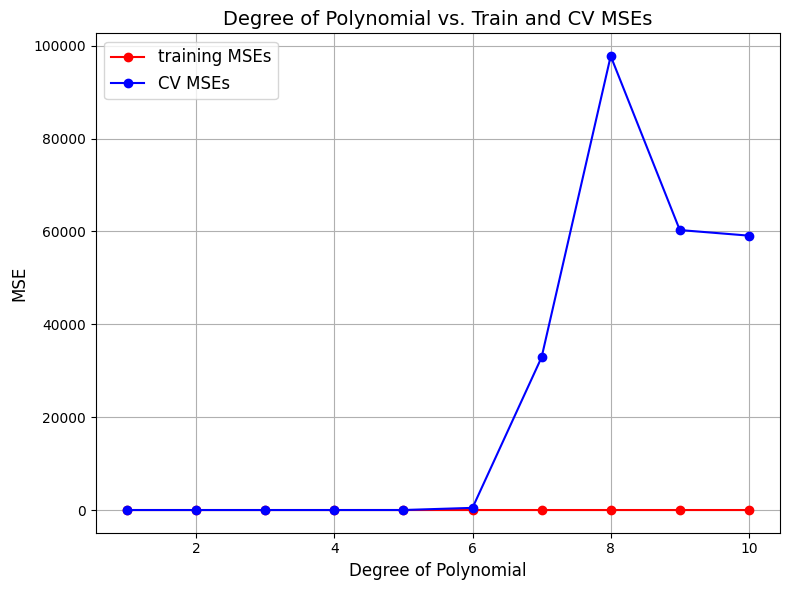

In [10]:
# Create the plot
degrees = range(1 , 11)
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_Rmses, '-o', color='red', label='training MSEs')
plt.plot(degrees, cv_Rmses, '-o', color='blue', label='CV MSEs')

# Add labels, title, and legend
plt.xlabel('Degree of Polynomial', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Degree of Polynomial vs. Train and CV MSEs', fontsize=14)
plt.legend(fontsize=12)

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Choosing the Best Model

When selecting a model, choose one that performs well on both the training and cross-validation sets, avoiding overfitting. We found that a degree-2 to degree-4 polynomial minimizes both training and test MSE. However, from degree-5 to degree-8, there is a noticeable jump. In terms of cross-validation, we chose degree-2 as it provides the best balance and it also start, although all models from degree-1 onward perform reasonably well. Thus, degree-2 is the best choice for the application.

In [11]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
final_degree = np.argmin(cv_Rmses) + 1
print(f"Lowest CV RMSE is found in the model with degree = {final_degree}")

Lowest CV RMSE is found in the model with degree = 2


*We still check all degrees to ensure performance across the training set, test set, and cross-validation.*

In [12]:
for final_degree in range(1 , 10):
        X_test_poly = polys[final_degree].transform(X_test)
        X_test_poly_scaler = scalers[final_degree].transform(X_test_poly)
        y_test_hat = models[final_degree].predict(X_test_poly_scaler)
        test_mse = mean_squared_error(y_test_hat , y_test)
        sqrt_test_mse = np.sqrt(test_mse)
        print(f"Training RMSE: {train_Rmses[final_degree]:.2f}")
        print(f"Cross Validation RMSE: {cv_Rmses[final_degree]:.2f}")
        print(f"Test RMSE: {sqrt_test_mse:.2f}")

Training RMSE: 0.37
Cross Validation RMSE: 0.35
Test RMSE: 0.39
Training RMSE: 0.35
Cross Validation RMSE: 0.36
Test RMSE: 0.39
Training RMSE: 0.33
Cross Validation RMSE: 0.43
Test RMSE: 0.47
Training RMSE: 0.29
Cross Validation RMSE: 2.31
Test RMSE: 1.42
Training RMSE: 0.21
Cross Validation RMSE: 466.63
Test RMSE: 98.54
Training RMSE: 0.10
Cross Validation RMSE: 32905.38
Test RMSE: 30748.95
Training RMSE: 0.00
Cross Validation RMSE: 97798.94
Test RMSE: 37308.05
Training RMSE: 0.00
Cross Validation RMSE: 60311.99
Test RMSE: 105105.40
Training RMSE: 0.00
Cross Validation RMSE: 59106.23
Test RMSE: 134949.50


**Degree-2 is the best choice for the application.**  
We create a degree-2 polynomial and train the model using gradient descent to achieve the lowest error.

In [27]:
final_poly = PolynomialFeatures(degree = 2 , include_bias = False)
X_train_final_poly = final_poly.fit_transform(X_train)
final_scaler = StandardScaler()
X_train_final_poly_scaled = final_scaler.fit_transform(X_train_final_poly)
insurance_Model = LinearRegression()
insurance_Model.fit(X_train_final_poly_scaled , y_train)
y_hat_final_train = insurance_Model.predict(X_train_final_poly_scaled)
evaluate_regression_performance(y_train , y_hat_final_train)

--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1336
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0668
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2060
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.3655
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0223%
   - MAPE expres

In this step, we extract the model's learned coefficients (`Fst_weights`) and bias (`Fst_bias`) from the trained polynomial regression model (`insurance_Model`). The coefficients represent the weights assigned to each feature, including interaction terms and squared terms, after transforming the original features into polynomial features.

We then map these coefficients to the corresponding feature names, which were generated by the `final_poly` polynomial feature transformer, excluding the target variable ('charges'). The feature names are stored in `expanded_feature_names`, and the weights are organized into a DataFrame (`weights_df`) for clear visualization. Finally, the coefficients (weights) for each feature, along with the bias (intercept) value, are printed in a readable format.

This provides insight into the relationship between the features and the target variable ('charges'), including any non-linear interactions or squared terms.


In [28]:
Fst_weights = insurance_Model.coef_
Fst_bias = insurance_Model.intercept_
X_train_columns_without_charges = enhanced_df.columns.drop(['charges'])
expanded_feature_names = final_poly.get_feature_names_out(X_train_columns_without_charges)

weights_df = pd.DataFrame(Fst_weights, index=expanded_feature_names, columns=['Weights'])

# Print the beautiful message
print(f"The coefficients (weights) for each feature, including interaction and squared terms, are:\n")
print(weights_df)

print(f"\nThe bias (intercept) value is: {Fst_bias}")

The coefficients (weights) for each feature, including interaction and squared terms, are:

                                    Weights
age                                0.756421
bmi                                0.252093
children                           0.331640
sex_male                          -0.137457
smoker_yes                         0.257334
region_northwest                  -0.001824
region_southeast                  -0.031218
region_southwest                  -0.044099
age^2                             -0.189659
age bmi                           -0.037934
age children                      -0.183710
age sex_male                       0.095034
age smoker_yes                    -0.527422
age region_northwest               0.039360
age region_southeast               0.118292
age region_southwest               0.123065
bmi^2                             -0.210994
bmi children                       0.024617
bmi sex_male                       0.123508
bmi smoker_yes              

**`Gradient Descent` is used to minimize the MSE by iteratively updating the model's weights and bias. but it fails to converge,**

In [ ]:
class GradientDescentRegressor:
    def __init__(self, input, target, Weights=Fst_weights, bias=Fst_bias, convergence_limit=1e-10, iterations=100, alpha=0.01, lambda_=0.01):
        self.input = input
        self.target = target
        self.Weights = Weights
        self.bias = bias
        self.convergence_limit = convergence_limit
        self.iterations = iterations
        self.alpha = alpha
        self.lambda_ = lambda_
        self.predict = np.matmul(input, Weights) + bias

    def compute_cost(self, target):
        # Compute Mean Squared Error (MSE) and return the final RMSE (Root of MSE)
        self.mse = mean_squared_error(y_true=target, y_pred=self.predict)
        final_rmse = self.mse
        return final_rmse

    def compute_gradient(self, input, target):
        m, n = input.shape
        f_wb = self.predict
        dj_dw = np.zeros(n)
        dj_db = 0
        for i in range(m):
            error = f_wb[i] - target[i]
            for j in range(n):
                dj_dw[j] += error * input[i, j]
            dj_db += error

        dj_dw = (1 / m) * dj_dw
        dj_db = (1 / m) * dj_db

        # Adding regularization term for weights
        for k in range(n):
            dj_dw[k] += (self.lambda_ / m) * self.Weights[k]

        return dj_dw, dj_db

    def gradient_descent(self, input, target):
        cost_history = []
        previous_cost = float('inf')  # Initially set to a large value to enter the loop
        iteration_list = []

        for epoch in range(self.iterations):
            # Recalculate predictions
            self.predict = np.matmul(input, self.Weights) + self.bias

            # Compute the gradient and update weights and bias
            dj_dw, dj_db = self.compute_gradient(input, target)

            # Update Weights and Bias using the computed gradients
            temp_w = self.Weights - self.alpha * dj_dw
            temp_b = self.bias - self.alpha * dj_db

            self.Weights = temp_w
            self.bias = temp_b

            # Compute the RMSE and store it in the history
            cost = self.compute_cost(target)
            cost_history.append(cost)

            # Print the progress every 100 iterations with better wording
            if epoch % 100 == 0:
                print(f"Iteration {epoch}: MSE = {cost:.6f}")


            previous_cost = cost  # Update the previous cost after the iteration
            iteration_list.append(epoch)

        return f"Weights: {self.Weights}, Bias: {self.bias}, Last MSE: {cost_history[-1]:.10f}, Total Iterations: {len(iteration_list)}"


In [ ]:
itr = GradientDescentRegressor(
    input=X_train_final_poly_scaled,
    target=y_train,
    Weights=Fst_weights,
    bias=Fst_bias,
    iterations=1000,
    alpha=0.001,
)

output = itr.gradient_descent(X_train_final_poly_scaled , y_train)
print(output)

Iteration 0: MSE = 0.133589
Iteration 100: MSE = 0.133589
Iteration 200: MSE = 0.133589
Iteration 300: MSE = 0.133589
Iteration 400: MSE = 0.133589
Iteration 500: MSE = 0.133589
Iteration 600: MSE = 0.133589
Iteration 700: MSE = 0.133589
Iteration 800: MSE = 0.133589
Iteration 900: MSE = 0.133589
Weights: [ 0.75641242  0.25209004  0.33163612 -0.1374557   0.25733156 -0.00182364
 -0.03121763 -0.04409861 -0.18965489 -0.03793284 -0.18370761  0.09503268
 -0.52741464  0.03935982  0.11829079  0.12306316 -0.21099135  0.02461704
  0.12350617  0.62434458 -0.09363052 -0.14985019 -0.08295068 -0.06662687
  0.0089184  -0.08909962  0.02365189  0.01308186 -0.0241812  -0.1374557
  0.02959644  0.03615271  0.03230317 -0.00692899  0.25733156  0.00265755
  0.0203557   0.0396071  -0.00182364  0.          0.         -0.03121763
  0.         -0.04409861], Bias: 9.107695121082255, Last MSE: 0.1335889192, Total Iterations: 1000


**Cv error**

In [ ]:
X_cv_final_poly = final_poly.transform(X_cv)
X_cv_final_poly_scaled = final_scaler.transform(X_cv_final_poly)
y_cv_hat = insurance_Model.predict(X_cv_final_poly_scaled)
evaluate_regression_performance(y_cv_hat , y_cv)

--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1207
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0604
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2049
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.3475
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0234%
   - MAPE expres

**Test error**

In [ ]:
X_test_poly = final_poly.transform(X_test)
X_test_poly_scaled = final_scaler.transform(X_test_poly)
X_test_predict = insurance_Model.predict(X_test_poly_scaled)
evaluate_regression_performance(X_test_predict , y_test)

--- Performance Evaluation ---

1. Mean Squared Error (MSE): 0.1507
   - MSE calculates the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily, making it a sensitive measure of overall prediction accuracy.

2. Scaled Mean Squared Error (MSE/2): 0.0754
   - This is a scaled version of MSE, used for specific use cases. Here, it is scaled down by dividing by 2 to see a more normalized value.

3. Mean Absolute Error (MAE): 0.2081
   - MAE represents the average of the absolute errors. It is more intuitive than MSE since it measures the average magnitude of errors without considering their direction (positive or negative).

4. Root Mean Squared Error (RMSE): 0.3882
   - RMSE gives an idea of the magnitude of the error in the same units as the target variable. It is useful when you want to assess the absolute error and is particularly sensitive to large errors.

5. Mean Absolute Percentage Error (MAPE): 0.0237%
   - MAPE expres

### Saving the Polynomial Transformer



In [ ]:
import joblib

# Define the path where the transformer will be saved
drive_path = "/content/drive/My Drive/Colab Notebooks/Insurance project/"

try:
    # Save the Polynomial Transformer to the specified path
    joblib.dump(final_poly, drive_path + 'Final_Poly_Transformer.pkl')
    print("Polynomial Transformer saved successfully!")
except Exception as e:
    print(f"Error saving the Polynomial Transformer: {e}")

Polynomial Transformer saved successfully!


In [17]:
import joblib
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler on Polynomial Features (X_train_final_poly)
Final_Scaler = StandardScaler()
X_train_final_poly_scaled = Final_Scaler.fit_transform(X_train_final_poly)  # Fit on training data

# Save the fitted scaler
scaler_path = "/content/drive/My Drive/Colab Notebooks/Insurance project/Final_Scaler.pkl"
joblib.dump(Final_Scaler, scaler_path)

print(f"Scaler saved successfully at: {scaler_path}")


Scaler saved successfully at: /content/drive/My Drive/Colab Notebooks/Insurance project/Final_Scaler.pkl


In [34]:
import joblib
# Define the path where the model will be saved
drive_path = "/content/drive/My Drive/Colab Notebooks/Insurance project/"

try:
    joblib.dump(insurance_Model, drive_path + 'insurance_Model.pkl')
    print(f"insurance_Model Polynomial regression saved successfully at {drive_path}")
except Exception as e:
    print(f"Error saving the Linear Regression model: {e}")

insurance_Model Polynomial regression saved successfully at /content/drive/My Drive/Colab Notebooks/Insurance project/


Next part : https://colab.research.google.com/drive/18edGCvmeg2rkFo2TDy6h-8JYrpxpXo1v?usp=sharing